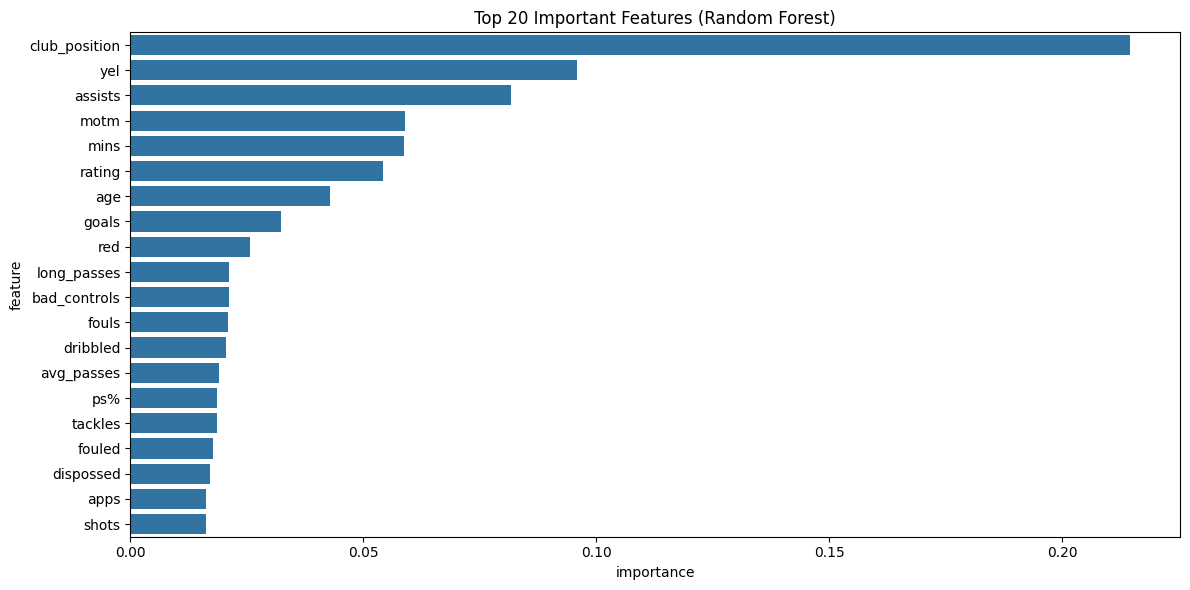

In [4]:
plt.figure(figsize=(12, 6))
sns.barplot(data=feat_imp_df.head(20), x='importance', y='feature')
plt.title('Top 20 Important Features (Random Forest)')
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import joblib  # 저장용

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, classification_report
from imblearn.over_sampling import SMOTE

from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# 데이터 로딩
x_train = pd.read_csv("./model_data/x.csv")
y_train = pd.read_csv("./model_data/y.csv").squeeze().astype(int)

# x_train.drop(columns=['motm', 'position', 'through_passes'], inplace=True)

# 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x_train)
# 'motm', 'position', 'through_passes']
joblib.dump(scaler, "./scaler/Random_Forest_scaler.pkl")

# SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y_train)

# 훈련/검증 분할
X_train, X_val, y_train_split, y_val = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42
)

# 모델 정의
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
}

# 성능 추적용
best_model = None
best_score = 0
best_name = ""

for name, model in models.items():
    model.fit(X_train, y_train_split)
    y_pred = model.predict(X_val)
    acc = accuracy_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)

    print(f"\n📌 [{name}]")
    print(f"✅ Accuracy : {acc:.4f}")
    print(f"✅ F1 Score : {f1:.4f}")
    print(classification_report(y_val, y_pred, digits=4))

    if f1 > best_score:
        best_score = f1
        best_model = model
        best_name = name

# 모델 저장
joblib.dump(best_model, f"{best_name}.pkl")
print(f"\n💾 가장 성능 좋은 모델 [{best_name}] 을 'transfer_model.pkl'로 저장했습니다.")



📌 [Logistic Regression]
✅ Accuracy : 0.5894
✅ F1 Score : 0.5898
              precision    recall  f1-score   support

           0     0.5896    0.5883    0.5890      4338
           1     0.5891    0.5905    0.5898      4337

    accuracy                         0.5894      8675
   macro avg     0.5894    0.5894    0.5894      8675
weighted avg     0.5894    0.5894    0.5894      8675


📌 [Random Forest]
✅ Accuracy : 0.8599
✅ F1 Score : 0.8530
              precision    recall  f1-score   support

           0     0.8289    0.9071    0.8663      4338
           1     0.8974    0.8128    0.8530      4337

    accuracy                         0.8599      8675
   macro avg     0.8632    0.8599    0.8596      8675
weighted avg     0.8632    0.8599    0.8596      8675


📌 [XGBoost]
✅ Accuracy : 0.8289
✅ F1 Score : 0.8099
              precision    recall  f1-score   support

           0     0.7741    0.9290    0.8445      4338
           1     0.9112    0.7288    0.8099      4337

    a

c:\Users\Playdata\AppData\Local\miniconda3\lib\site-packages\xgboost\training.py:183: UserWarning: [14:41:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


C:\Users\Playdata\AppData\Local\Temp\ipykernel_17044\2318676374.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feat_imp_df, palette="viridis")
C:\Users\Playdata\AppData\Local\Temp\ipykernel_17044\2318676374.py:24: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Playdata\AppData\Local\Temp\ipykernel_17044\2318676374.py:24: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Playdata\AppData\Local\Temp\ipykernel_17044\2318676374.py:24: UserWarning: Glyph 51201 (\N{HANGUL SYLLABLE JEOG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Playdata\AppData\Local\Temp\ipykernel_17044\2318676374.py:24: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from font(s) Dej

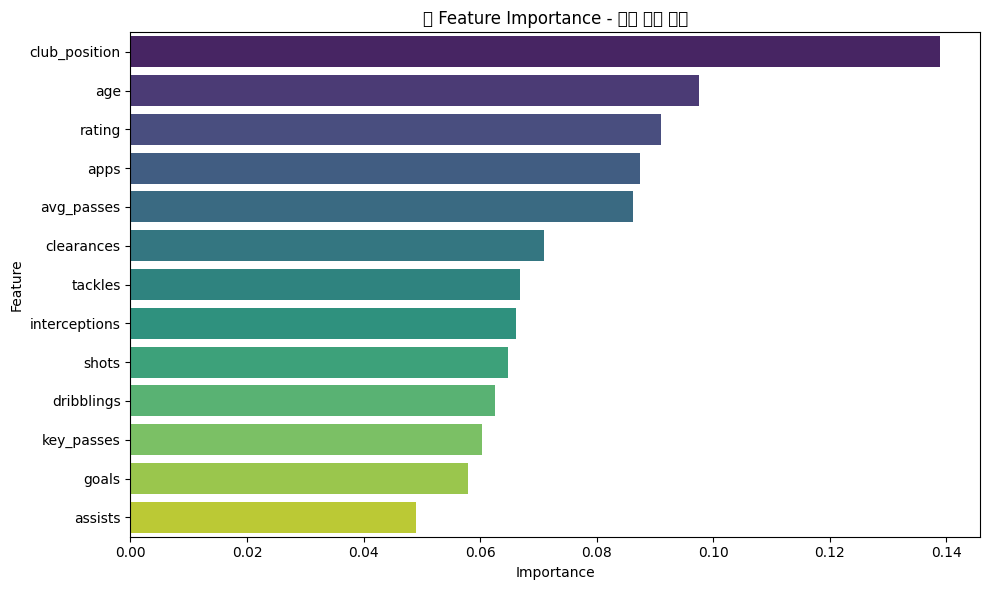

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# 모델 훈련 후 best_model 또는 특정 모델에서 중요도 추출
importances = best_model.feature_importances_  # RandomForest 또는 XGBoost일 경우

# 피처 이름 리스트 (너가 말한 순서 그대로)
feature_names = ['age', 'apps', 'goals', 'assists', 'shots',
                 'rating', 'tackles', 'interceptions', 'clearances', 'key_passes',
                 'dribblings', 'avg_passes', 'club_position']

# 중요도 DataFrame 생성
feat_imp_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feat_imp_df, palette="viridis")
plt.title("📊 Feature Importance - 이적 예측 모델")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()
